In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
knn = pd.read_csv("C:/Users/goodg/OneDrive/Documents/iris/Iris.csv")

knn.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dataset shape: (150, 6)

Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Statistical summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

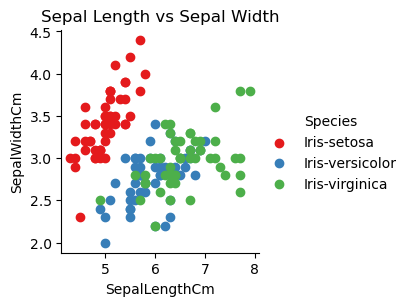

<Figure size 800x600 with 0 Axes>

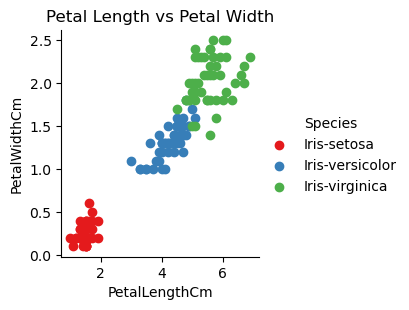

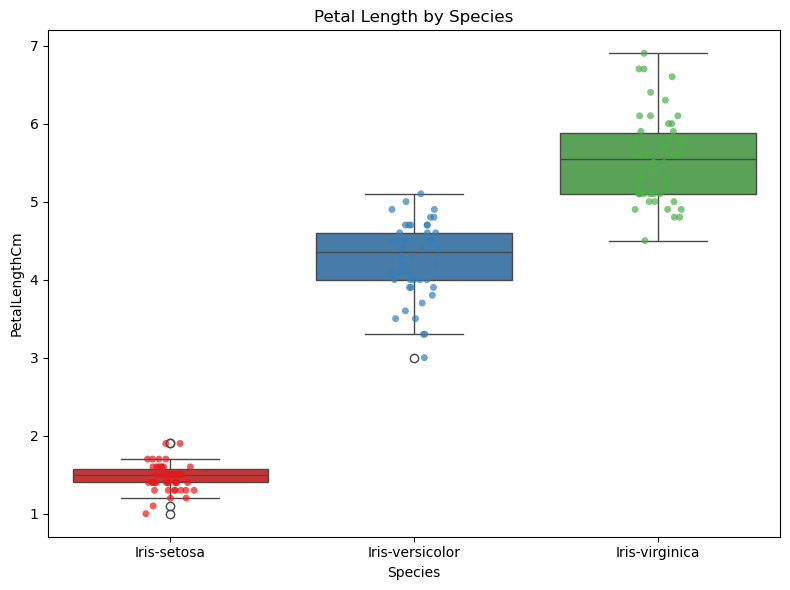

In [2]:

    
y = knn['Species']
print(f"Dataset shape: {knn.shape}")

# Check for missing values
print("\nMissing values:")
print(knn.isnull().sum())

# Statistical summary
print("\nStatistical summary:")
print(knn.describe())

# Check class distribution
print("\nClass distribution:")
print(knn['Species'].value_counts())

# Visualize the data
import seaborn as sns

# Define a consistent color palette
palette = "Set1" 

# Sepal scatter plot
plt.figure(figsize=(8, 6))
sns.FacetGrid(knn, hue="Species", palette=palette) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.title("Sepal Length vs Sepal Width")

# Petal scatter plot
plt.figure(figsize=(8, 6))
sns.FacetGrid(knn, hue="Species", palette=palette) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.title("Petal Length vs Petal Width")

# Box plot with strip plot overlay
plt.figure(figsize=(8, 6))
# Use hue instead of palette directly
sns.boxplot(x="Species", y="PetalLengthCm", data=knn, hue="Species", palette=palette, legend=False)
sns.stripplot(x="Species", y="PetalLengthCm", data=knn, jitter=True, 
              hue="Species", palette=palette, alpha=0.7, legend=False)
plt.title("Petal Length by Species")



# Display all plots
plt.tight_layout()
plt.show()

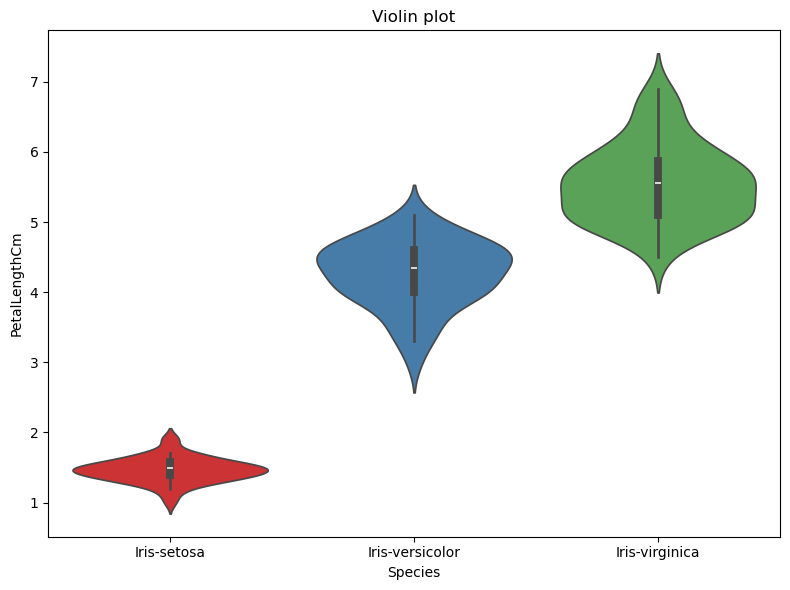

In [3]:
plt.figure(figsize=(8, 6))
# Use hue instead of palette directly
sns.violinplot(x="Species", y="PetalLengthCm", data=knn, hue="Species", palette=palette, legend=False)
plt.title("Violin plot")

# Display all plots
plt.tight_layout()
plt.show()

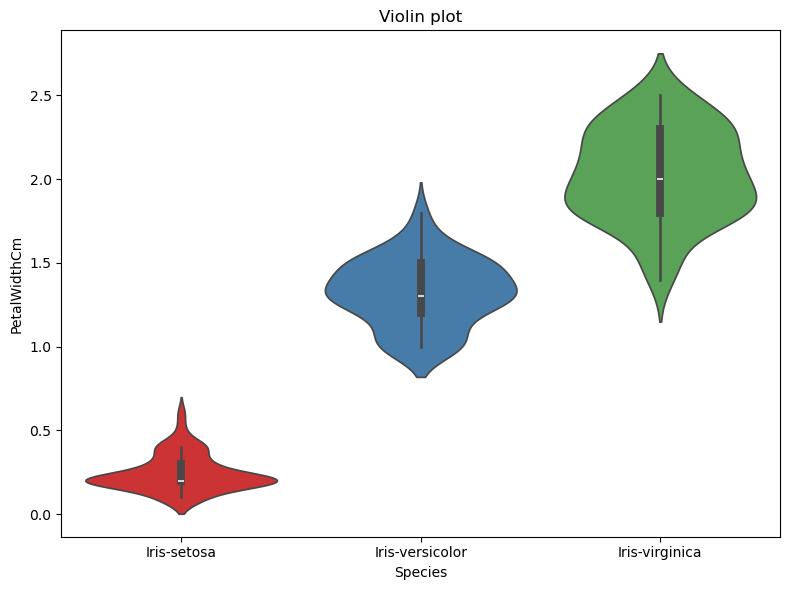

In [4]:

plt.figure(figsize=(8, 6))
# Use hue instead of palette directly
sns.violinplot(x="Species", y="PetalWidthCm", data=knn, hue="Species", palette=palette, legend=False)
plt.title("Violin plot")
# Display all plots
plt.tight_layout()
plt.show()

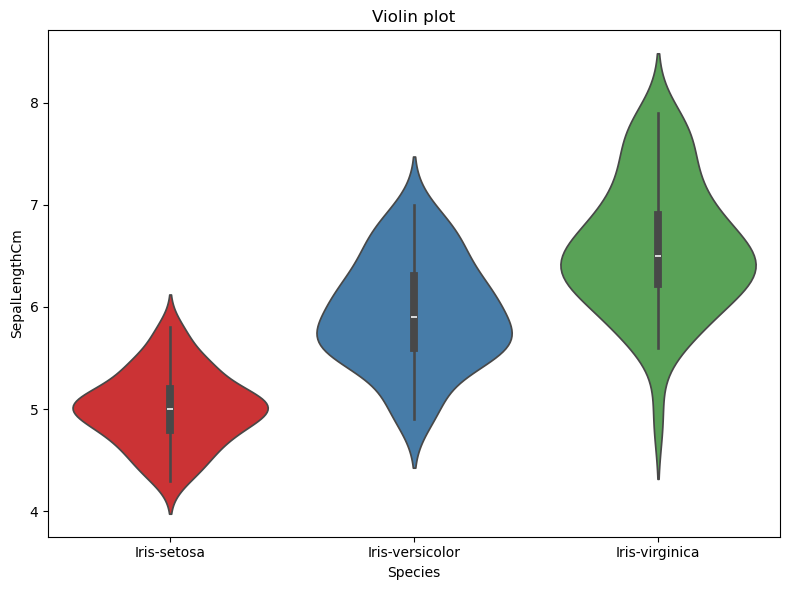

In [5]:
plt.figure(figsize=(8, 6))
# Use hue instead of palette directly
sns.violinplot(x="Species", y="SepalLengthCm", data=knn, hue="Species", palette=palette, legend=False)
plt.title("Violin plot")
# Display all plots
plt.tight_layout()
plt.show()


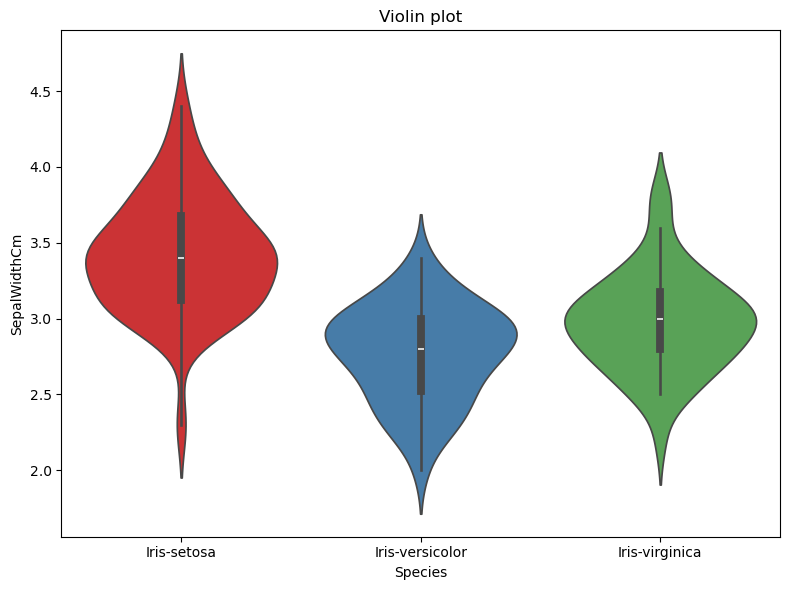

In [6]:
plt.figure(figsize=(8, 6))
# Use hue instead of palette directly
sns.violinplot(x="Species", y="SepalWidthCm", data=knn, hue="Species", palette=palette, legend=False)
plt.title("Violin plot")
# Display all plots
plt.tight_layout()
plt.show()

In [7]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

knn.shape

(150, 6)

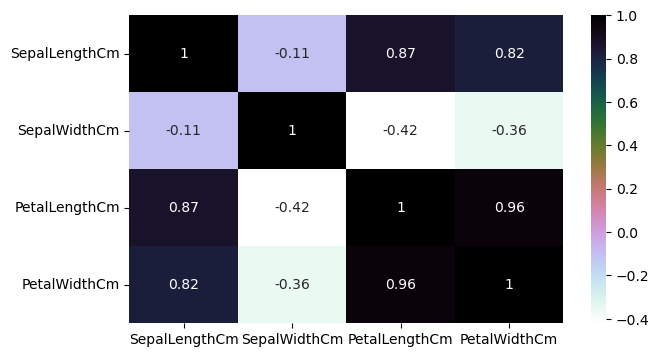

In [8]:

knn.head()
knn_numeric = knn.drop(columns=['Id', 'Species'])

# Plot heatmap with correlation matrix
plt.figure(figsize=(7, 4))
sns.heatmap(knn_numeric.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [9]:
train, test = train_test_split(knn, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [10]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [11]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


In [12]:
model = svm.SVC(kernel='linear') #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9777777777777777


In [13]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


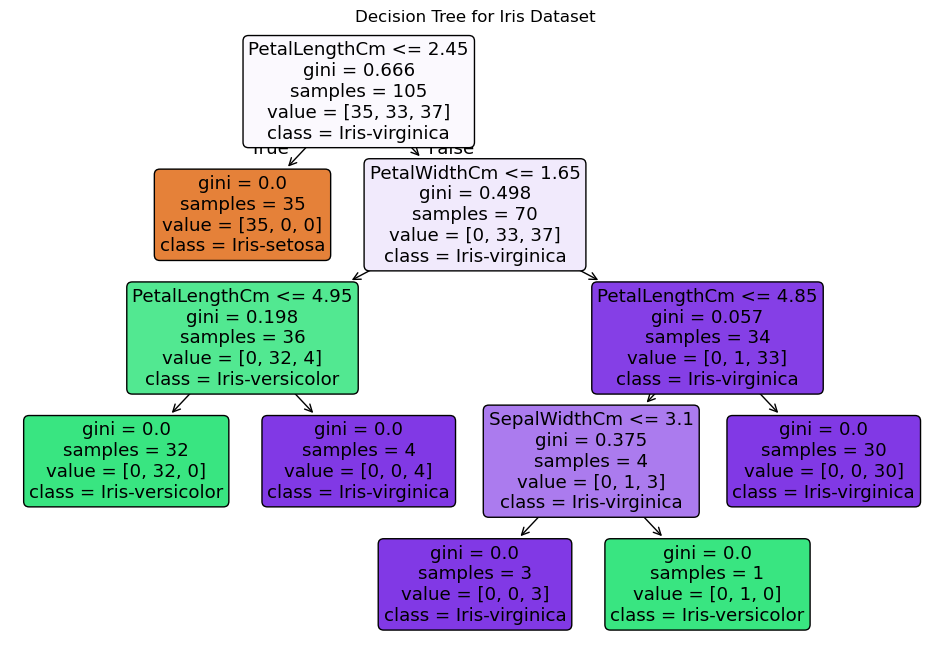

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model,
          filled=True,
          feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          class_names=model.classes_,
          rounded=True)

plt.title("Decision Tree for Iris Dataset")
plt.show()

In [15]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


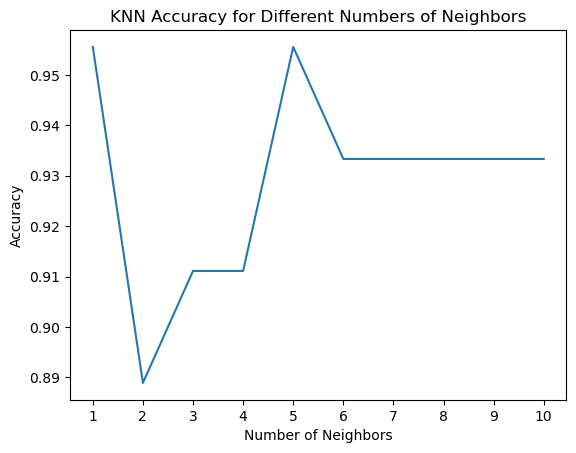

In [99]:
a_index = list(range(1, 11))
a = pd.Series(dtype=float)  # Create an empty Series with float dtype
x = list(range(1, 11))

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = pd.concat([a, pd.Series([metrics.accuracy_score(test_y, prediction)])], ignore_index=True)

# Plot the accuracy
plt.plot(a_index, a)
plt.xticks(x)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Numbers of Neighbors')
plt.show()